# Importing Necessary Packages

In [1]:
#packages for data data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
# Importing Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from keras.models import Sequential
from keras.layers import Dense, LSTM,Bidirectional
# Importing evaluation modules
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score
#data scalling
from sklearn.preprocessing import MinMaxScaler
minmax_scaler=MinMaxScaler()


# Reading the Data

In [2]:
df = pd.read_excel('(미디어에버) BioParticle Counter 6개월 측정 20230314.xlsx',
                   sheet_name='data',
                  header=1)

# Data Preparation

### Dropping Un-necessary Columns

In [3]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.dropna(axis=0,inplace=True)

In [4]:
df['Dust']=df['Dust'].astype(int)
df['Bio']=df['Bio'].astype(int)

In [5]:
df['Date_Time']=df['Day'].astype(str)+' '+df['Time'].astype(str)
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

# Data Visualizations

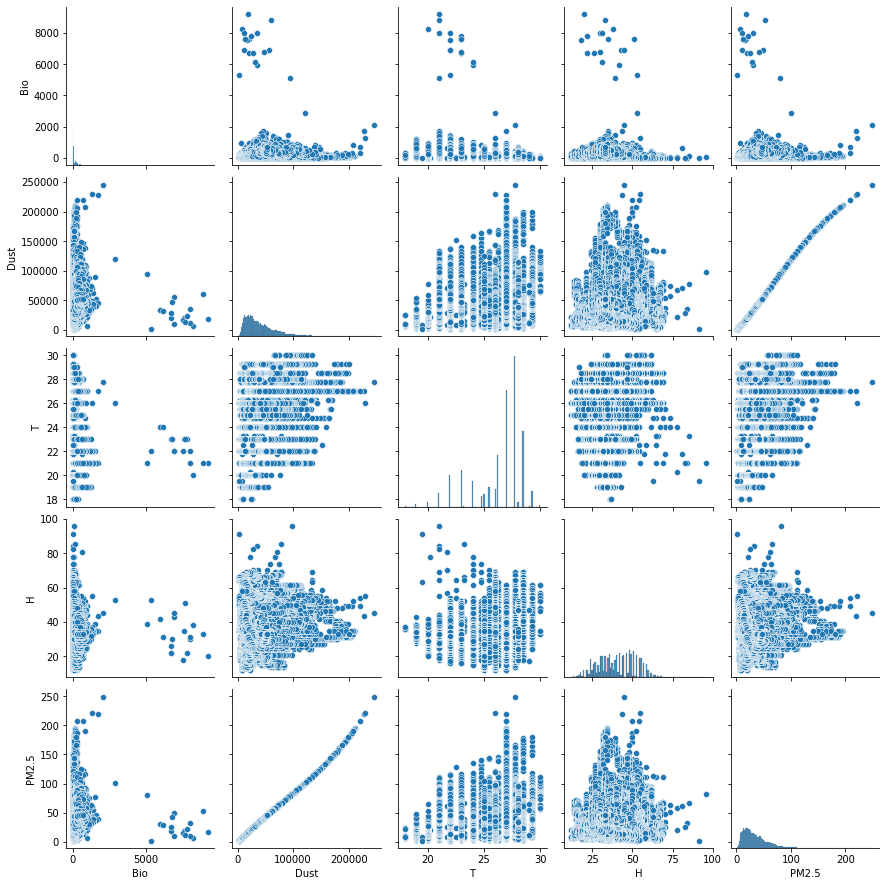

In [6]:
sns.pairplot(df)

# Feature Engineering

In [7]:
df['Date_Time'] =df['Date_Time'].values.astype(np.int64) // 10 ** 9
df.drop(['Day','Time'],axis=1,inplace=True)

### Features Correlation

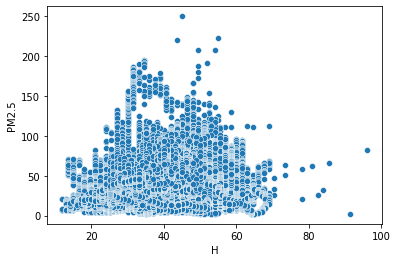

Pearson Correlation : 0.09812844081702435


In [8]:
sns.scatterplot(x=df['H'],y=df['PM2.5'])
plt.xlabel('H')
plt.ylabel('PM2.5')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['H'],df['PM2.5'])[0][1])

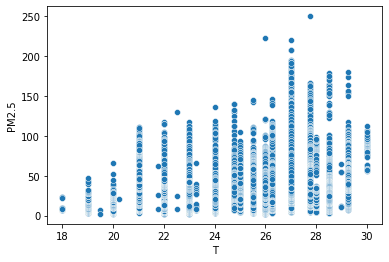

Pearson Correlation : 0.11350918067415086


In [9]:
sns.scatterplot(x=df['T'],y=df['PM2.5'])
plt.xlabel('T')
plt.ylabel('PM2.5')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['T'],df['PM2.5'])[0][1])

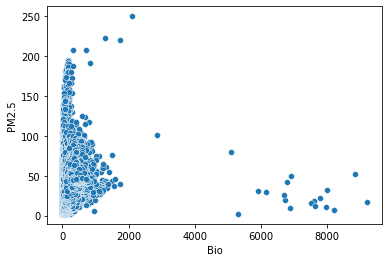

Pearson Correlation : 0.11075081066413414


In [10]:
sns.scatterplot(x=df['Bio'],y=df['PM2.5'])
plt.xlabel('Bio')
plt.ylabel('PM2.5')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['Bio'],df['PM2.5'])[0][1])

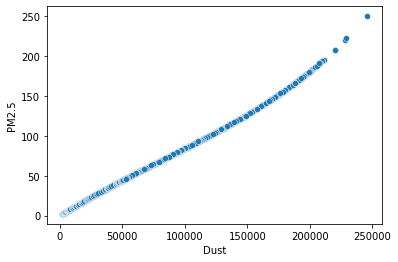

Pearson Correlation : 0.999415875119069


In [11]:
sns.scatterplot(x=df['Dust'],y=df['PM2.5'])
plt.xlabel('Dust')
plt.ylabel('PM2.5')
plt.show()
np.corrcoef(df['Dust'],df['PM2.5'])[0][1]
print('Pearson Correlation :',np.corrcoef(df['Dust'],df['PM2.5'])[0][1])

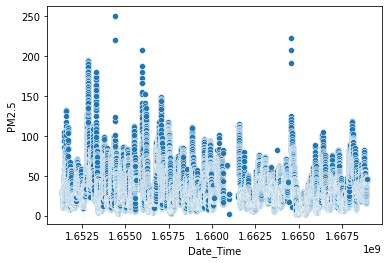

Pearson Correlation : -0.10511572055576339


In [12]:
sns.scatterplot(x=df['Date_Time'],y=df['PM2.5'])
plt.xlabel('Date_Time')
plt.ylabel('PM2.5')
plt.show()
print('Pearson Correlation :',np.corrcoef(df['Date_Time'],df['PM2.5'])[0][1])

In [13]:
X=df.drop('PM2.5',axis=1)
y=df['PM2.5']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Permutation Importance

In [15]:
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
#models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SGD Regressor', SGDRegressor()))
#models.append(('SV Regressor', SVR()))

In [16]:
permutation_imp={}

In [17]:
for name,model in models:
    regressor=model
    regressor.fit(X, y)
    # Calculate Permutation Importance
    result = permutation_importance(regressor, X_test, y_test, scoring='neg_mean_squared_error',n_repeats=10)

    # Access the importance scores
    importance_scores = result.importances_mean
    permutation_imp[model]=importance_scores


In [18]:
permutation_imp_score=pd.DataFrame(permutation_imp,X.columns)
permutation_imp_score

,Ridge(),LinearRegression(),KNeighborsRegressor(),DecisionTreeRegressor(),SGDRegressor()
Bio,0.013429,0.013220,0.000120,0.000155,1.359853e+40
Dust,992.288186,990.793037,374.276595,992.074841,4.826849e+43
T,0.005332,0.005421,0.000000,0.000010,2.126765e+36
H,0.005991,0.005763,0.000001,0.000063,2.126765e+36
Date_Time,-0.000023,-0.000024,298.023866,0.000046,4.880481e+43


In [19]:
# selecting on relevant features

In [25]:
X=df.Dust
y=df['PM2.5']

In [26]:
X=X.values.reshape(X.shape[0],1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Willmote Index

In [28]:
def willmott_index(observed, predicted):
    mean_observed = np.mean(observed)
    numerator = np.sum(np.abs(observed - predicted))
    denominator = np.sum(np.abs(observed - mean_observed))
    wi = (1 - (numerator / denominator))
    return wi

In [29]:
train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
cv_scores=[]

In [30]:
models_names=['Ridge','LR','KNN Regressor','RF Regressor','DT Regressor','SGD Regressor','SV Regressor']

In [31]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Create an instance of Elastic Net regression
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

from sklearn.ensemble import AdaBoostRegressor
adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=0.1)

import xgboost as xgb

# Create an instance of XGBoost regressor
xgboost = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)

+ ==================================================================================================== +
			1-For Ridge The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.7126871599662254
--------------------------------------------------
Mean absolute error (MAE) :  0.48613387275748415
--------------------------------------------------
R2 score :  0.9989802528635786
--------------------------------------------------
CV Score :  [0.99796598 0.99900774 0.99927858 0.99871086 0.9991162 ]
--------------------------------------------------
Willmott's Index: 0.9717584483738045
--------------------------------------------------


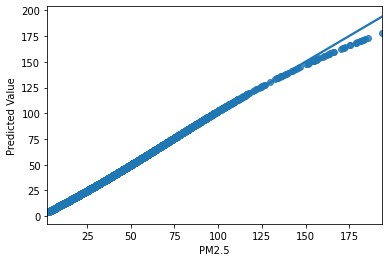

							-----------------------------------------------------------
							 Time for detection (Ridge) : 9.813 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			2-For LinearRegression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.7126871599662672
--------------------------------------------------
Mean absolute error (MAE) :  0.48613387275749287
--------------------------------------------------
R2 score :  0.9989802528635785
--------------------------------------------------
CV Score :  [0.99796598 0.99900774 0.99927858 0.99871086 0.9991162 ]
--------------------------------------------------
Willmott's Index: 0.971758448373804
--------------------------------------------------


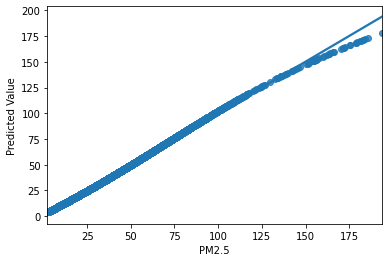

							-----------------------------------------------------------
							 Time for detection (LinearRegression) : 1.679 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			3-For KNeighborsRegressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.022457510324398414
--------------------------------------------------
Mean absolute error (MAE) :  0.0025727861228082714
--------------------------------------------------
R2 score :  0.9999989874468209
--------------------------------------------------
CV Score :  [0.99965561 0.99999922 0.99999994 0.99997276 0.99999994]
--------------------------------------------------
Willmott's Index: 0.9998505360844364
--------------------------------------------------


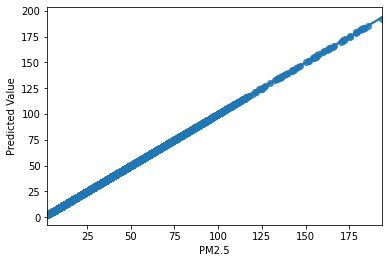

							-----------------------------------------------------------
							 Time for detection (KNeighborsRegressor) : 2.203 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			4-For Random Forest The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.011109600847801424
--------------------------------------------------
Mean absolute error (MAE) :  0.0014606385519462905
--------------------------------------------------
R2 score :  0.9999997522055718
--------------------------------------------------
CV Score :  [0.99982177 0.9999989  0.99999997 0.99999101 0.99999998]
--------------------------------------------------
Willmott's Index: 0.9999151453922804
--------------------------------------------------


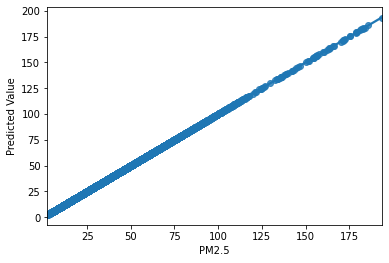

							-----------------------------------------------------------
							 Time for detection (Random Forest) : 54.254 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			5-For Decision Tree The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.013848001380294824
--------------------------------------------------
Mean absolute error (MAE) :  0.0017014015461002455
--------------------------------------------------
R2 score :  0.9999996149928261
--------------------------------------------------
CV Score :  [0.9998161  0.99999904 0.99999996 0.99999766 0.99999997]
--------------------------------------------------
Willmott's Index: 0.9999011584621156
--------------------------------------------------


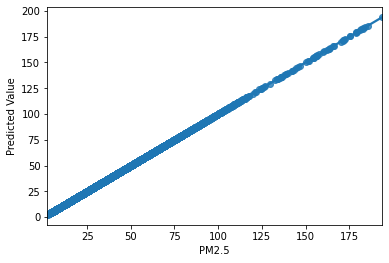

							-----------------------------------------------------------
							 Time for detection (Decision Tree) : 2.358 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			6-For SGD Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  7.0061847247303144e+16
--------------------------------------------------
Mean absolute error (MAE) :  5.793079700388702e+16
--------------------------------------------------
R2 score :  -9.855026421323435e+30
--------------------------------------------------
CV Score :  [-4.05651639e+32 -7.73621038e+32 -7.25261386e+32 -5.26987276e+32
 -3.71716429e+32]
--------------------------------------------------
Willmott's Index: -3365442496429574.5
--------------------------------------------------


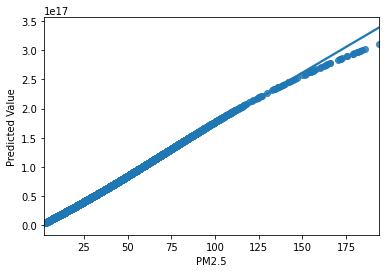

							-----------------------------------------------------------
							 Time for detection (SGD Regressor) : 8.501 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			7-For Lasso Regression The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.7126871370357746
--------------------------------------------------
Mean absolute error (MAE) :  0.48613386779864814
--------------------------------------------------
R2 score :  0.9989802529291987
--------------------------------------------------
CV Score :  [0.99796598 0.99900774 0.99927858 0.99871086 0.9991162 ]
--------------------------------------------------
Willmott's Index: 0.9717584486618841
--------------------------------------------------


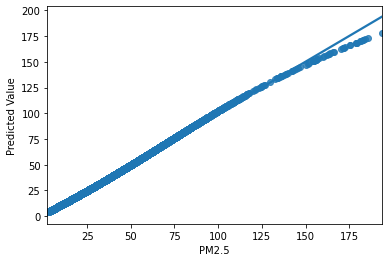

							-----------------------------------------------------------
							 Time for detection (Lasso Regression) : 1.916 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			8-For ElasticNet Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.7126871588014698
--------------------------------------------------
Mean absolute error (MAE) :  0.48613387250560014
--------------------------------------------------
R2 score :  0.9989802528669118
--------------------------------------------------
CV Score :  [0.99796598 0.99900774 0.99927858 0.99871086 0.9991162 ]
--------------------------------------------------
Willmott's Index: 0.9717584483884375
--------------------------------------------------


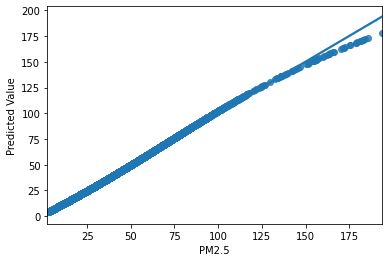

							-----------------------------------------------------------
							 Time for detection (ElasticNet Regressor) : 1.67 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			9-For Adaboost Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.013848005918826322
--------------------------------------------------
Mean absolute error (MAE) :  0.001701401546100179
--------------------------------------------------
R2 score :  0.9999996149925737
--------------------------------------------------
CV Score :  [0.9998161  0.99999904 0.99999996 0.99999766 0.99999997]
--------------------------------------------------
Willmott's Index: 0.9999011584621156
--------------------------------------------------


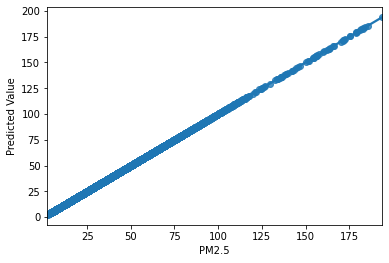

							-----------------------------------------------------------
							 Time for detection (Adaboost Regressor) : 82.755 seconds...
							-----------------------------------------------------------

+ ==================================================================================================== +
			10-For XGboost Regressor The Performance result is: 
+ ==================================================================================================== +
Root mean squared error (RMSE) :  0.0631536076519459
--------------------------------------------------
Mean absolute error (MAE) :  0.03268572717680652
--------------------------------------------------
R2 score :  0.9999919926104875
--------------------------------------------------
CV Score :  [0.99980645 0.99999057 0.9999941  0.9999917  0.99999392]
--------------------------------------------------
Willmott's Index: 0.9981011492857564
--------------------------------------------------


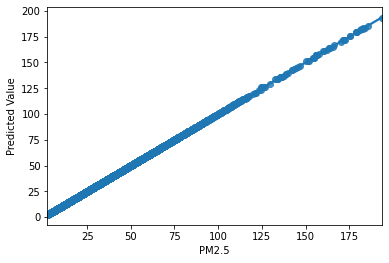

							-----------------------------------------------------------
							 Time for detection (XGboost Regressor) : 27.584 seconds...
							-----------------------------------------------------------



In [32]:
# Create an instance of Lasso regression
lasso = Lasso(alpha=0.1)
# check the performance on diffrent regressor
models = []
models.append(('Ridge', Ridge()))
models.append(('LinearRegression', LinearRegression()))
models.append(('KNeighborsRegressor', KNeighborsRegressor()))
models.append(('Random Forest', RandomForestRegressor()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('SGD Regressor', SGDRegressor()))
#models.append(('SV Regressor', SVR()))
models.append(('Lasso Regression',  Lasso(alpha=0.01)))
models.append(('ElasticNet Regressor',  ElasticNet(alpha=0.01, l1_ratio=0.05)))
models.append(('Adaboost Regressor', AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=0.1)))
models.append(('XGboost Regressor', xgb.XGBRegressor(n_estimators=100, learning_rate=0.1)))

train_l = []
test_l = []
mae_l = []
rmse_l = []
r2_l = []
wi_l = []
cv_scores=[]

import time
i = 0
for name,model in models:
    i = i+1
    start_time = time.time()
    
    # Fitting model to the Training set
    clf = model
    clf.fit(X_train, y_train)
    
    # Scores of model
    train = model.score(X_train, y_train)
    test = model.score(X_test, y_test)
    
    train_l.append(train)
    test_l.append(test)
    
    # predict values
    predictions = clf.predict(X_test)
    # RMSE
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    rmse_l.append(rmse)
    # MAE
    mae = mean_absolute_error(y_test,predictions)
    mae_l.append(mae)
    # R2 score
    r2 = r2_score(y_test,predictions)
    r2_l.append(r2)
    scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    cv_scores.append(scores)


    print("+","="*100,"+")
    print('\033[1m' + f"\t\t\t{i}-For {name} The Performance result is: " + '\033[0m')
    print("+","="*100,"+")
    print('Root mean squared error (RMSE) : ', rmse)   
    print("-"*50)
    print('Mean absolute error (MAE) : ', mae)
    print("-"*50)
    print('R2 score : ', r2)
    print("-"*50)
    print('CV Score : ', scores)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    print(f"Willmott's Index: {wi}")
    wi_l.append(wi)
    print("-"*50)
    wi = willmott_index(y_test, predictions)
    
    
    sns.regplot(x=y_test,y=predictions)
    plt.ylabel("Predicted Value")
    plt.show()
        
        
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print(f"\t\t\t\t\t\t\t Time for detection ({name}) : {round((time.time() - start_time), 3)} seconds...")
    print("\t\t\t\t\t\t\t-----------------------------------------------------------")
    print()
    


In [27]:
report = pd.DataFrame({ "Training Score": train_l,
                     "Testing Score": test_l, "MAE": mae_l,
                     "RMSE": rmse_l,
                     "R2 Score": r2_l,
                    "Willmot Index": wi_l})
report

,Model,Training Score,Testing Score,MAE,RMSE,R2 Score,Willmot Index
0,Ridge,9.988378e-01,9.988141e-01,4.905741e-01,7.743963e-01,9.988141e-01,9.714964e-01
1,LR,9.988378e-01,9.988141e-01,4.905741e-01,7.743963e-01,9.988141e-01,9.714964e-01
2,KNN Regressor,9.999523e-01,9.999979e-01,2.720470e-03,3.233975e-02,9.999979e-01,9.998419e-01
3,RF Regressor,9.999921e-01,9.999988e-01,1.666027e-03,2.486516e-02,9.999988e-01,9.999032e-01
4,DT Regressor,1.000000e+00,9.999990e-01,1.862171e-03,2.216472e-02,9.999990e-01,9.998918e-01
5,SGD Regressor,-4.745443e+31,-4.771962e+31,1.284399e+17,1.553388e+17,-4.771962e+31,-7.462681e+15
6,SV Regressor,9.963652e-01,9.969606e-01,1.051812e-01,1.239727e+00,9.969606e-01,9.938887e-01


In [20]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have your data in X (features) and y (target variable)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the ANN model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=512)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

y_val_pred=model.predict(X_test)
mse, rmse, mae, r2 = evaluate_regression(y_test, y_val_pred)
print("Evaluation Metrics LSTM:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))
wi=willmott_index(y_test, y_val_pred)
print(wi)

Epoch 1/1000
100/100 [==============================] - 1s 3ms/step - loss: 72431.5703
Epoch 2/1000
100/100 [==============================] - 0s 3ms/step - loss: 5.8451
Epoch 3/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.7138
Epoch 4/1000
100/100 [==============================] - 0s 3ms/step - loss: 1.6776
Epoch 5/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.8932
Epoch 6/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.7305
Epoch 7/1000
100/100 [==============================] - 0s 4ms/step - loss: 2.1105
Epoch 8/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.9983
Epoch 9/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.9481
Epoch 10/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.7925
Epoch 11/1000
100/100 [==============================] - 0s 5ms/step - loss: 3.3014
Epoch 12/1000
100/100 [==============================] - 0s 3ms/step - loss: 2.18

100/100 [==============================] - 0s 4ms/step - loss: 73.7689
Epoch 97/1000
100/100 [==============================] - 0s 4ms/step - loss: 1407.2168
Epoch 98/1000
100/100 [==============================] - 0s 4ms/step - loss: 1711.9645
Epoch 99/1000
100/100 [==============================] - 0s 4ms/step - loss: 7.9867
Epoch 100/1000
100/100 [==============================] - 0s 4ms/step - loss: 660.5826
Epoch 101/1000
100/100 [==============================] - 0s 4ms/step - loss: 3893.2866
Epoch 102/1000
100/100 [==============================] - 0s 4ms/step - loss: 4.1096A: 0s - loss: 
Epoch 103/1000
100/100 [==============================] - 0s 4ms/step - loss: 3.5510
Epoch 104/1000
100/100 [==============================] - 0s 4ms/step - loss: 308.2414
Epoch 105/1000
100/100 [==============================] - ETA: 0s - loss: 4830.14 - 0s 4ms/step - loss: 4614.9351
Epoch 106/1000
100/100 [==============================] - 0s 4ms/step - loss: 3.0509
Epoch 107/1000
100/100 [==

100/100 [==============================] - 0s 3ms/step - loss: 5.0587
Epoch 191/1000
100/100 [==============================] - 0s 4ms/step - loss: 98.8377
Epoch 192/1000
100/100 [==============================] - 0s 4ms/step - loss: 116.8830
Epoch 193/1000
100/100 [==============================] - 0s 4ms/step - loss: 838.7060
Epoch 194/1000
100/100 [==============================] - 0s 4ms/step - loss: 45.3835
Epoch 195/1000
100/100 [==============================] - 0s 4ms/step - loss: 113.2541
Epoch 196/1000
100/100 [==============================] - 0s 5ms/step - loss: 123.4908
Epoch 197/1000
100/100 [==============================] - 0s 4ms/step - loss: 807.1428
Epoch 198/1000
100/100 [==============================] - 0s 4ms/step - loss: 17.8809
Epoch 199/1000
100/100 [==============================] - 0s 3ms/step - loss: 324.1330
Epoch 200/1000
100/100 [==============================] - 0s 4ms/step - loss: 323.0102
Epoch 201/1000
100/100 [==============================] - 0s 4m

100/100 [==============================] - 0s 4ms/step - loss: 286.3294
Epoch 285/1000
100/100 [==============================] - 0s 4ms/step - loss: 4.5794
Epoch 286/1000
100/100 [==============================] - 0s 4ms/step - loss: 4.6881
Epoch 287/1000
100/100 [==============================] - 0s 4ms/step - loss: 14.8910
Epoch 288/1000
100/100 [==============================] - 0s 4ms/step - loss: 14.4211
Epoch 289/1000
100/100 [==============================] - 0s 3ms/step - loss: 163.0938
Epoch 290/1000
100/100 [==============================] - 0s 3ms/step - loss: 381.3739
Epoch 291/1000
100/100 [==============================] - 0s 4ms/step - loss: 3.2892
Epoch 292/1000
100/100 [==============================] - 0s 4ms/step - loss: 5.7285
Epoch 293/1000
100/100 [==============================] - 0s 3ms/step - loss: 6.6672
Epoch 294/1000
100/100 [==============================] - 0s 3ms/step - loss: 49.0690
Epoch 295/1000
100/100 [==============================] - 0s 4ms/step -

Epoch 379/1000
100/100 [==============================] - 0s 4ms/step - loss: 56.4811
Epoch 380/1000
100/100 [==============================] - 0s 4ms/step - loss: 15.4265
Epoch 381/1000
100/100 [==============================] - 0s 4ms/step - loss: 44.6021
Epoch 382/1000
100/100 [==============================] - 0s 4ms/step - loss: 21.3485
Epoch 383/1000
100/100 [==============================] - 0s 4ms/step - loss: 32.0474
Epoch 384/1000
100/100 [==============================] - 0s 4ms/step - loss: 40.9764
Epoch 385/1000
100/100 [==============================] - 0s 4ms/step - loss: 2.1018
Epoch 386/1000
100/100 [==============================] - 0s 4ms/step - loss: 31.2078
Epoch 387/1000
100/100 [==============================] - 0s 4ms/step - loss: 30.8233
Epoch 388/1000
100/100 [==============================] - 0s 4ms/step - loss: 28.4265
Epoch 389/1000
100/100 [==============================] - 0s 4ms/step - loss: 41.8866
Epoch 390/1000
100/100 [==============================]

100/100 [==============================] - 0s 4ms/step - loss: 0.7988
Epoch 475/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.6587
Epoch 476/1000
100/100 [==============================] - 0s 5ms/step - loss: 0.7812
Epoch 477/1000
100/100 [==============================] - 0s 5ms/step - loss: 1.0914
Epoch 478/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.0583
Epoch 479/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.0859
Epoch 480/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.3796
Epoch 481/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.3088
Epoch 482/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.1962
Epoch 483/1000
100/100 [==============================] - 0s 4ms/step - loss: 3.9442
Epoch 484/1000
100/100 [==============================] - 0s 4ms/step - loss: 3.0509
Epoch 485/1000
100/100 [==============================] - 0s 4ms/step - loss: 3.

100/100 [==============================] - 0s 4ms/step - loss: 0.8160
Epoch 571/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.0888
Epoch 572/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.1248
Epoch 573/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.2757
Epoch 574/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.5019
Epoch 575/1000
100/100 [==============================] - 0s 5ms/step - loss: 2.0819
Epoch 576/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.4029
Epoch 577/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.9449
Epoch 578/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.1708
Epoch 579/1000
100/100 [==============================] - 0s 3ms/step - loss: 1.8357
Epoch 580/1000
100/100 [==============================] - 0s 4ms/step - loss: 3.2172
Epoch 581/1000
100/100 [==============================] - 0s 4ms/step - loss: 5.

100/100 [==============================] - 0s 4ms/step - loss: 1.1804
Epoch 666/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.8726
Epoch 667/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.0583
Epoch 668/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.9993
Epoch 669/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.9544
Epoch 670/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.3569
Epoch 671/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.8069
Epoch 672/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.8273
Epoch 673/1000
100/100 [==============================] - 0s 4ms/step - loss: 1.0601
Epoch 674/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.8753
Epoch 675/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.7774
Epoch 676/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.

100/100 [==============================] - 0s 4ms/step - loss: 0.6408
Epoch 762/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.6277
Epoch 763/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6312
Epoch 764/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6746
Epoch 765/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.6441
Epoch 766/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.6524
Epoch 767/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6292
Epoch 768/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6492
Epoch 769/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.6891
Epoch 770/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.6455
Epoch 771/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6534
Epoch 772/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.

100/100 [==============================] - 0s 3ms/step - loss: 0.9098
Epoch 858/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.7876
Epoch 859/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.7298
Epoch 860/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.8324
Epoch 861/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.6546
Epoch 862/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6553
Epoch 863/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.8427
Epoch 864/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6520
Epoch 865/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.7261
Epoch 866/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6843
Epoch 867/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.7385
Epoch 868/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.

100/100 [==============================] - 0s 3ms/step - loss: 0.6932
Epoch 954/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.7321
Epoch 955/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.8546
Epoch 956/1000
100/100 [==============================] - 0s 4ms/step - loss: 0.8480
Epoch 957/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6865
Epoch 958/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.7732
Epoch 959/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6977
Epoch 960/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.8665
Epoch 961/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.7503
Epoch 962/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.6911
Epoch 963/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.7322
Epoch 964/1000
100/100 [==============================] - 0s 3ms/step - loss: 0.

ValueError: Data must be 1-dimensional

In [22]:
a=np.reshape(y_val_pred,y_val_pred.shape[0])

In [24]:
wi=willmott_index(y_test, a)
wi

0.9697274253623721

In [21]:
y_test.shape,y_val_pred.shape

((12729,), (12729, 1))

# LSTM and BiLSTM

In [12]:
# Reshape the input data to match LSTM layer input shape
train_data = np.resize(X_train, (X_train.shape[0], X_train.shape[1], 1))
test_data = np.resize(X_test, (X_test.shape[0], X_test.shape[1], 1))
train_labels=y_train
test_labels=y_test

# LSTM

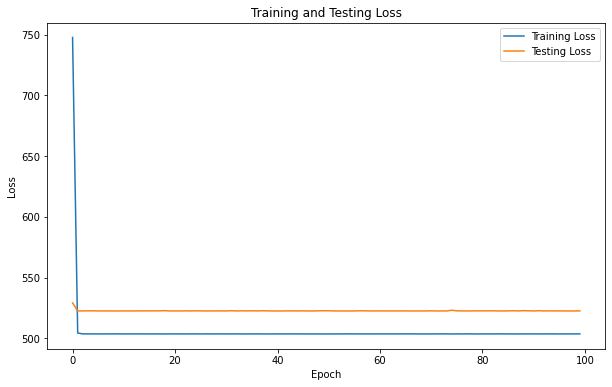

Evaluation Metrics LSTM:
Test MSE: 522.5089733687039
Test RMSE: 22.8584551833387
Test MAE: 17.54596850395862
Test R^2: -0.00011


In [14]:
# Define LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(64, input_shape=(train_data.shape[1], train_data.shape[2]),return_sequences=True))  # LSTM layer with 64 units
    model.add(LSTM(32, return_sequences=True))
    model.add(Dense(1))
    return model

# Define BiLSTM model
def create_bilstm_model():
    model = Sequential()
    model.add(Bidirectional(LSTM(128), input_shape=(train_data.shape[1], train_data.shape[2])))
    model.add(Dense(1))
    return model

# Define evaluation metrics
def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2
    
# Create and compile LSTM model
model = create_lstm_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
history=model.fit(train_data, train_labels, epochs=100, batch_size=32, verbose=0,
                  validation_data=(test_data, test_labels))
#cv_scores = cross_val_score(model, train_data, train_labels, cv=5, scoring=scoring)

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Evaluate LSTM model on validation data
y_val_pred = model.predict(test_data)
y_val_pred = y_val_pred.reshape(y_val_pred.shape[0],y_val_pred.shape[1]*y_val_pred.shape[2])
mse, rmse, mae, r2 = evaluate_regression(test_labels, y_val_pred)


print("Evaluation Metrics LSTM:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))

# BiLSTM

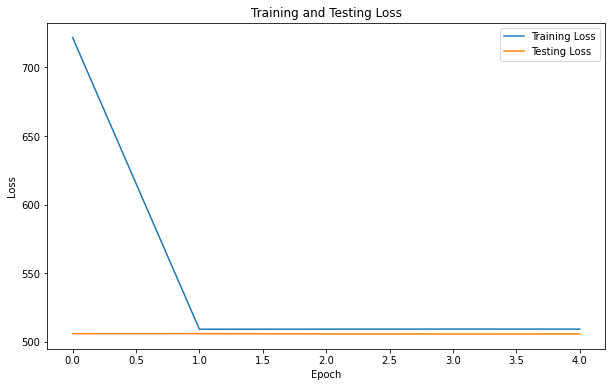

Evaluation Metrics LSTM:
Test MSE: 505.67039544007065
Test RMSE: 22.487116209956106
Test MAE: 17.224085680096284
Test R^2: -1e-05


In [30]:
# Create and compile BiLSTM model
model = create_bilstm_model()
model.compile(optimizer='adam', loss='mean_squared_error')

# Train LSTM model
history=model.fit(train_data, train_labels, epochs=5, batch_size=32, verbose=0,
                  validation_data=(test_data, test_labels))
#cv_scores = cross_val_score(model, train_data, train_labels, cv=5, scoring=scoring)

# Extract training and testing losses from history
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Plot training and testing losses
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

# Evaluate LSTM model on validation data
y_val_pred = model.predict(test_data)
#y_val_pred = y_val_pred.reshape(y_val_pred.shape[0],y_val_pred.shape[1]*y_val_pred.shape[2])
mse, rmse, mae, r2 = evaluate_regression(test_labels, y_val_pred)


print("Evaluation Metrics LSTM:")
print("Test MSE:", mse)
print("Test RMSE:", rmse)
print("Test MAE:", mae)
print("Test R^2:", round(r2,5))

In [31]:
X=np.concatenate((train_data, test_data), axis=0)

In [32]:
y=np.concatenate((train_labels, test_labels), axis=0)

# LSTM Cross Validation

In [33]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mae_l = []
mse_l=[]
rmse_l = []
r2_l = []
wi_l = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_lstm_model()
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    # Evaluate LSTM model on validation data
    y_pred = model.predict(X_test)
    y_pred = y_pred.reshape(y_pred.shape[0],y_pred.shape[1]*y_pred.shape[2])
    mse, rmse, mae, r2 = evaluate_regression(y_test, y_pred)
    wi=willmott_index(y_test,y_pred)
    mae_l.append(mae)
    mse_l.append(mse)
    rmse_l.append(rmse)
    r2_l.append(r2)
    wi_l.append(wi)

print("Cross Validation MSE:",np.mean(mse_l))
print("Cross Validation RMSE:",np.mean(rmse_l))
print("Cross Validation MAE:",np.mean(mae_l))
print("Cross Validation R2:",np.mean(r2_l))
print("Cross Validation WI:",np.mean(wi_l))

Cross Validation MSE: 508.2491506263571
Cross Validation RMSE: 22.543953529607453
Cross Validation MAE: 17.31261199055266
Cross Validation R2: -6.198751030015437e-05
Cross Validation WI: -12719.885409315195


# BiLSTM Cross Validation

In [34]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
mae_l = []
mse_l=[]
rmse_l = []
r2_l = []
wi_l = []
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model = create_bilstm_model()
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    # Evaluate LSTM model on validation data
    y_pred = model.predict(X_test)
    #y_pred = y_pred.reshape(y_pred.shape[0],y_pred.shape[1]*y_pred.shape[2])
    mse, rmse, mae, r2 = evaluate_regression(y_test, y_pred)
    wi=willmott_index(y_test,y_pred)
    mae_l.append(mae)
    mse_l.append(mse)
    rmse_l.append(rmse)
    r2_l.append(r2)
    wi_l.append(wi)

print("Cross Validation MSE:",np.mean(mse_l))
print("Cross Validation RMSE:",np.mean(rmse_l))
print("Cross Validation MAE:",np.mean(mae_l))
print("Cross Validation R2:",np.mean(r2_l))
print("Cross Validation WI:",np.mean(wi_l))

Cross Validation MSE: 508.2796138244106
Cross Validation RMSE: 22.544636455986222
Cross Validation MAE: 17.32103507475231
Cross Validation R2: -0.00012323448519584445
Cross Validation WI: -12726.144304158513
